(1) Selection. In the first 3N-MCTS phase, starting at the root node (the target molecule) of the search tree, the algorithm sequentially selects the most promising next position within the tree until a leaf node is reached (Fig. 2a). The algorithm balances the selection of high-value positions and unexplored positions. If a leaf node is visited for the first time, it is directly evaluated by a rollout. If it is visited for the second time, it is expanded by processing via the expansion policy.

(2) Expansion. Now, the possible transformations determining the follow-up positions of the current position are selected by applying the expansion procedure. The predicted follow-up positions are added to the tree as children of the leaf node, and the most promising position is selected for rollout.

(3) Rollout. This phase starts with checking the status of the position. If it is already solved, the algorithm directly receives a reward greater than 1 to encourage exploitation. Non-terminal states are subjected to a rollout, where actions are sampled from the rollout network recursively, until the state has been deconstructed into building blocks or a maximal depth is reached.

(4) Update. If a solution has been found during rollout, a reward of 1 is received. Partial rewards are given if some, but not all, molecules in the state are solved. If no solution was found, a reward of –1 is received. Here, bespoke scoring functions for the problem at hand, such as process chemistry or small-scale medicinal chemistry, can also be supplied. Eventually, the tree is updated to incorporate the achieved reward by updating the position values.

These four phases of 3N-MCTS are iterated until a time budget or maximal iteration count is exceeded. Finally, to obtain the synthesis plan, we repeatedly select the retrosynthetic step with the highest value until a solved position is reached, or a maximum depth has been exceeded, in which case the problem is unsolved.

In [2]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot

Example monte carlo pi approximation:

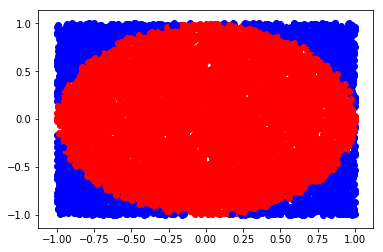

In [3]:
l = []

inside=0
outside=0

for i in range(0,10000):
    x = np.random.uniform(low=-1,high=1)
    y = np.random.uniform(low=-1,high=1)
    l.append((x,y))
    
    if math.sqrt(x**2+y**2) < 1:
        plot.scatter(x,y, c="r")
        inside+=1
    else:
        plot.scatter(x,y, c="b")
        outside+=1

In [4]:
pi_approx = (4*inside/(inside+outside))
print("pi is approximately",pi_approx)

pi is approximately 3.1528
